# Assignment 3: Exploring DINOv2


## Due: 2025-03-27

See [Assignment 1](https://github.com/erdmann/MVA_2025/blob/main/assignments/MVA_2025_AICVCH_Assignment_1.ipynb) for the main introduction to the Rijksmuseum paintings dataset.

This assignment applies the model presented in ["DINOv2: Learning Robust Visual Features without Supervision" by Oquab et al. (arXiv, April 2023)](https://arxiv.org/abs/2304.07193) and its follow-up at ["Vision Transformers Need Registers" by Darcet et al. (arXiv, April 2024)](https://arxiv.org/abs/2309.16588)


There are two main parts of the assignment.  
 - The first part uses [pre-trained DINVOv2 model (with and without registers)](https://github.com/facebookresearch/dinov2) to repeat the basic exercise of assignments 1 and 2 to organize overall image embeddings.  
 - The second uses the patch-wise embeddings produced by the model to perform semantic co-registration between a pair of images.

## IMPORTANT: rename your submitted .ipynb or .zip file to contain your family name somewhere prior to submission.  

Submit your .ipynb, or, if you have more than one file, a .zip file, to the "turnin" URL provided during class (redacted here because this repository is public).

## Name:
## Student ID:
## Date:

## Part 1: make a database of DINOv2 image embeddings, comparing the model with and without registers

As mentioned in the introduction above, the original DINOv2 model was later supplemented by a second paper mentioning the importance of additional register tokens.  Pretrained versions of the original models (of different sizes) and the updated models are both available easily from within pytorch, for example with `torch.hub.load('facebookresearch/dinov2', 'dinov2_vitg14')`.

In the fist part, we explore the qualitative relative performance of the two models in the whole-image embedding regime.

## 1. Original DINOv2 Model

Using the largest pre-trained DINOv2 model without registers you can manage (for example, `dinov2_vitg14`) for each of the images in the Rijksmuseum paintings or BnF posters collections, perform steps 1 through 4 of Assignment 1 to make a large rectangular grid of images from the whole image (cls token) embeddings.


### Notes

- DINOv2 does not come with a preprocessor like CLIP, so you will need to use standard ImageNet normalization as part of your preprocessing.  
- To process an image with DINOv2, you will need to run `model.forward_features(...)`, which returns a dictionary with several keys, among which is `x_norm_clstoken`.  This corresponds to the whole-image embedding.
- Note that this embedding is not L2-normalized (the norm in the name comes from the normalization layer).

Show all your code.  Indicate where you have used AI to assist you where approproate.  Comment the code, but only give comments where they are useful and non-obvious.

## 2. DINOv2 Model with registers

Repeat the above using a with-registers version of the same model you used in the first step (for example, `dinov2_vitg14_reg`).

## 3. Comparison between original and with-register models

Compare these results to each other using whatever quantitative or qualitative means you think appropriate.  Are there specific cases in which one model seems to perform better than the other?  Give detailed examples (Note that if you paste an image into a markdown cell, it will typically be embedded in the .ipynb, but if you refer to an image by filename, you will need to include that filename in a .zip file with your submission.)

## 4. Comparison between DINOv2 and CLIP

4.1 Using your database of CLIP embeddings from Assignment 2, find and display image pairs or clusters that are mutually similar to each other (under a cosine metric) in the CLIP embedding but which are relatively dissimilar in the DINOv2 embedding (choose either the original or with-registers DINOv2 model).  

4.2 Find and display image pairs or clusters that are similar according to the DINOv2 embedding but which are dissimilar according to CLIP.

4.3 Find and display image pairs or clusters that are similar according to both models.


4.4 What detailed observations and inferences can you make about the results of these studies?

## Part 2: Semantic Registration

In this part of the homework we will utilize a pre-trained with-registers DINOv2 model to perform semantic registration between a pair of images by comparing the patch embedding tokens that are also produced by DINOv2. 

- The first is a drawing by [Pieter Bruegel the Elder](https://en.wikipedia.org/wiki/Pieter_Bruegel_the_Elder) entitled _Big Fish Eat Little Fish_ (https://nl.m.wikipedia.org/wiki/Bestand:Pieter_Bruegel_the_Elder_-_Big_Fish_Eat_Little_Fish,_1556_-_Google_Art_Project.jpg)

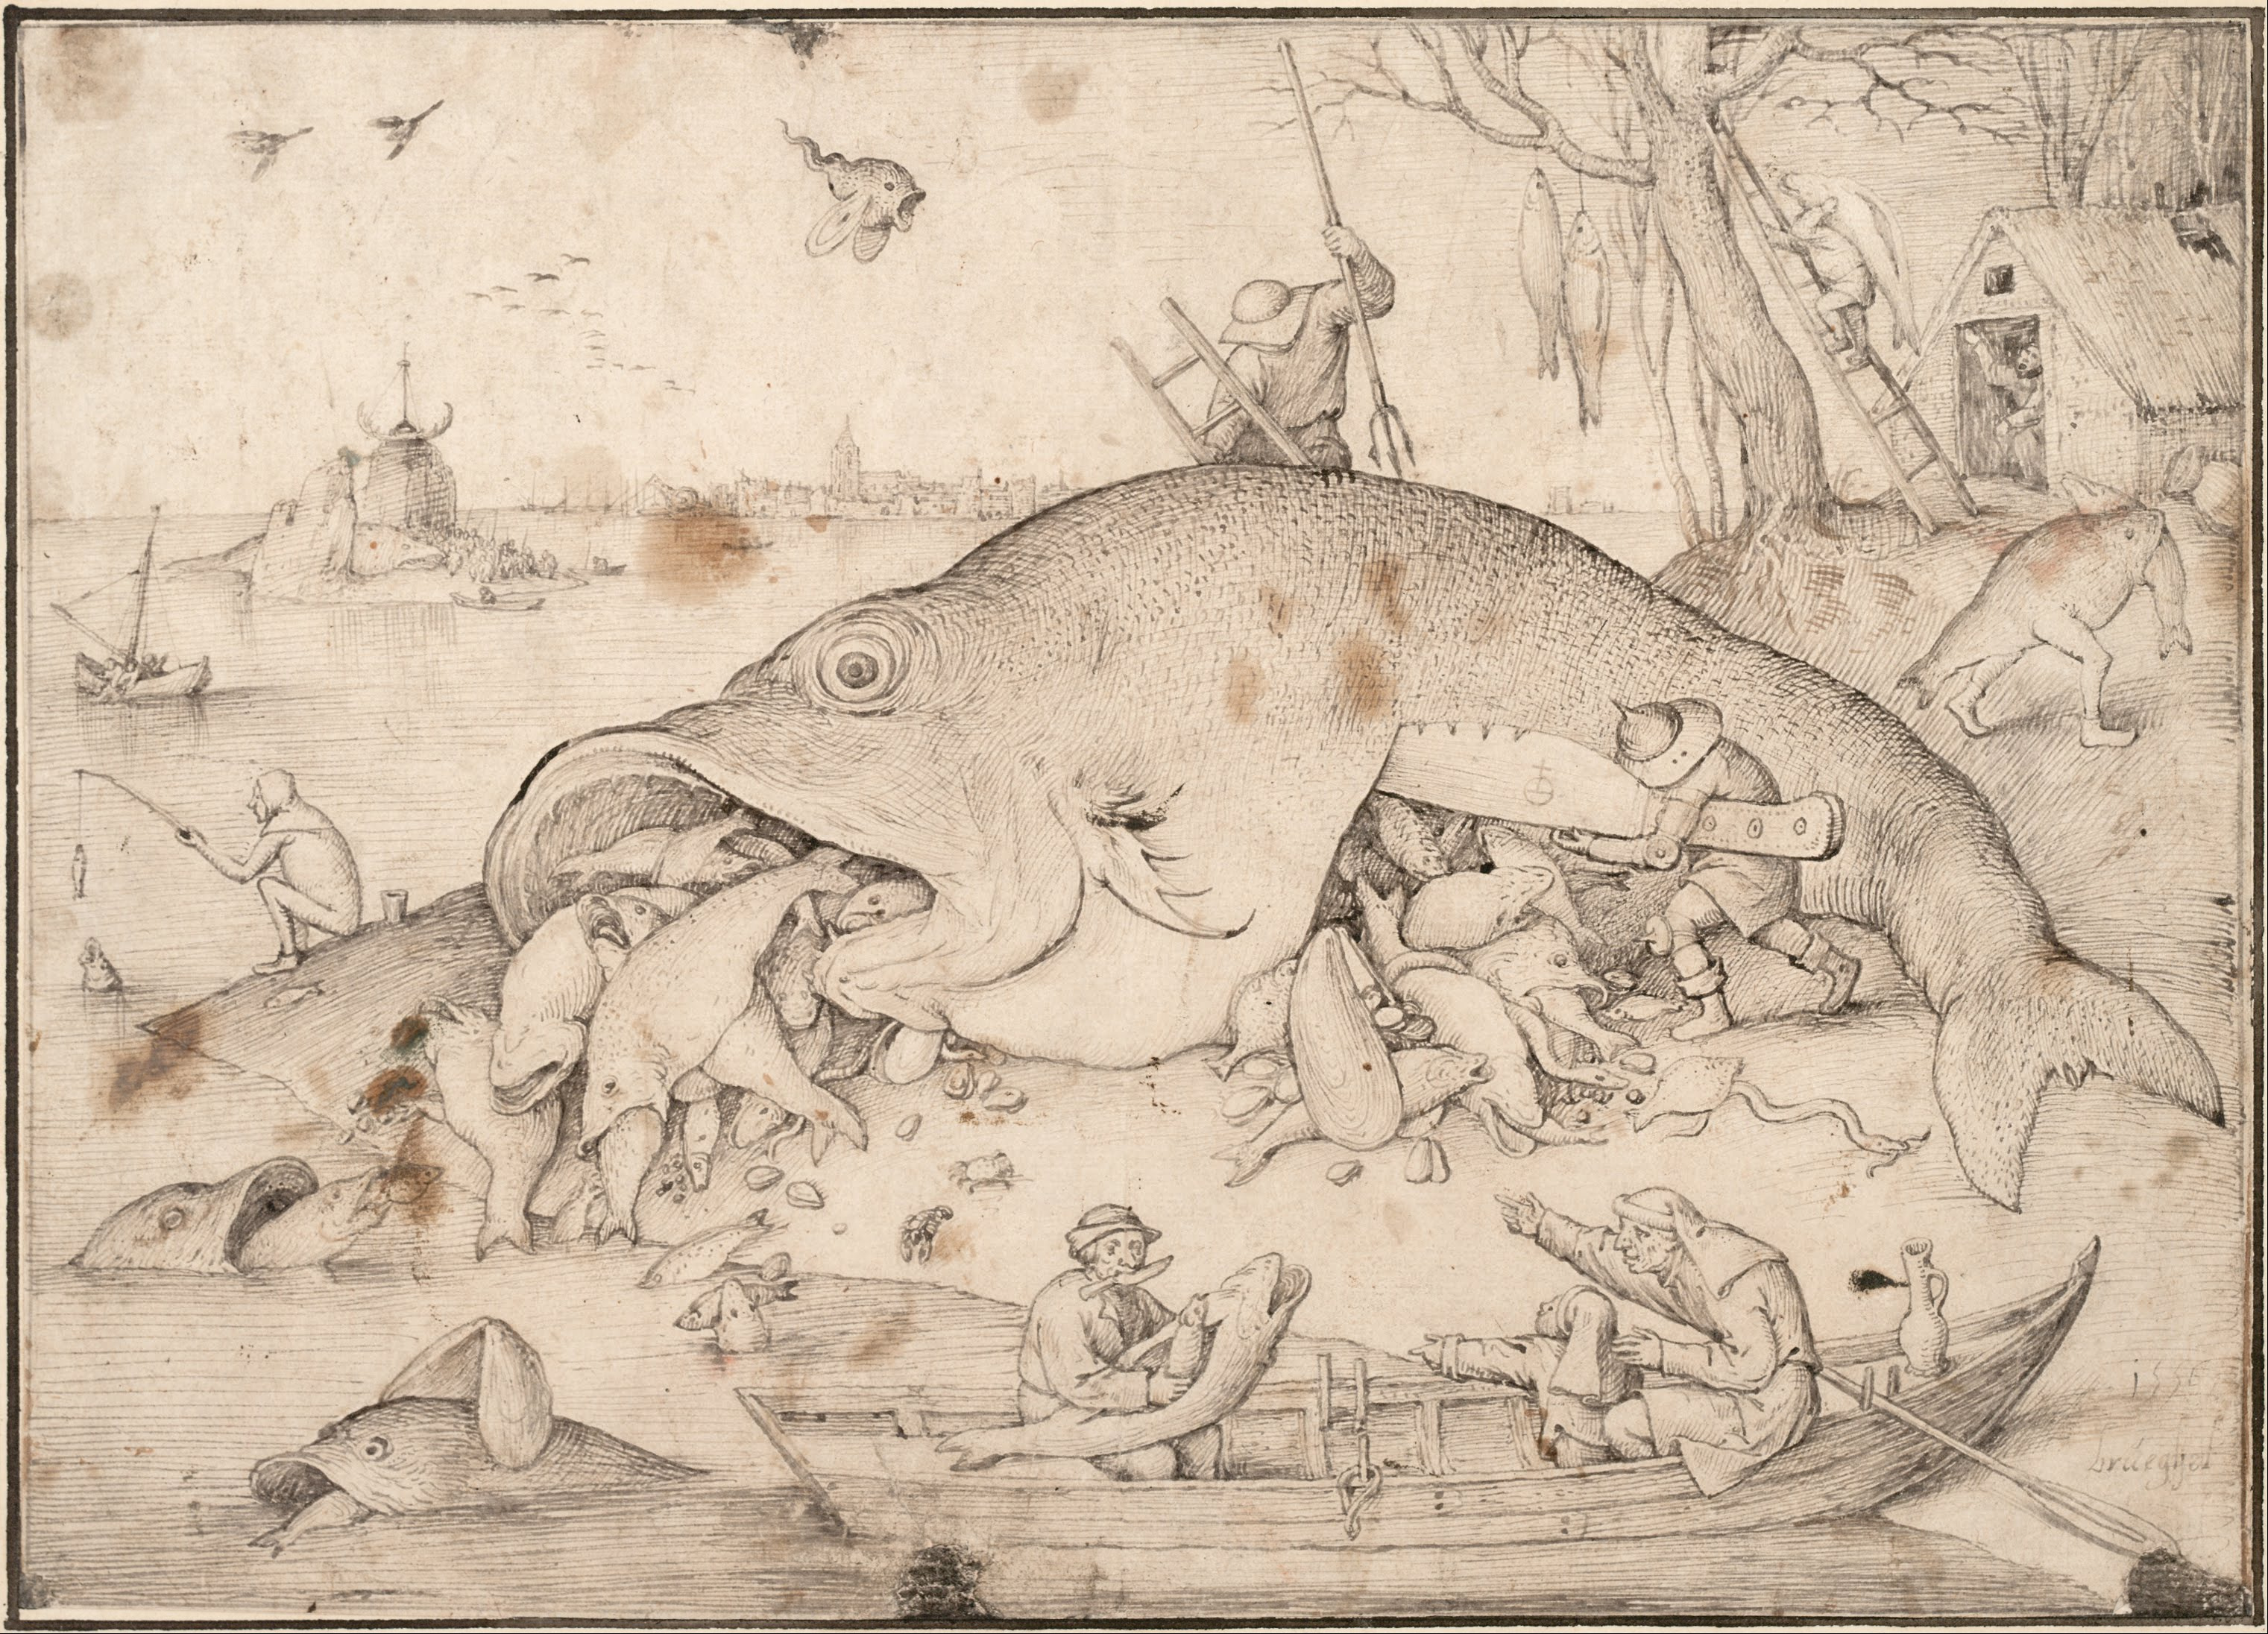




- The second is a [print by Pieter van der Heyden after the drawing]( https://www.britishmuseum.org/collection/image/62099001) (click on the "Download this image" button to get a full resolution version).


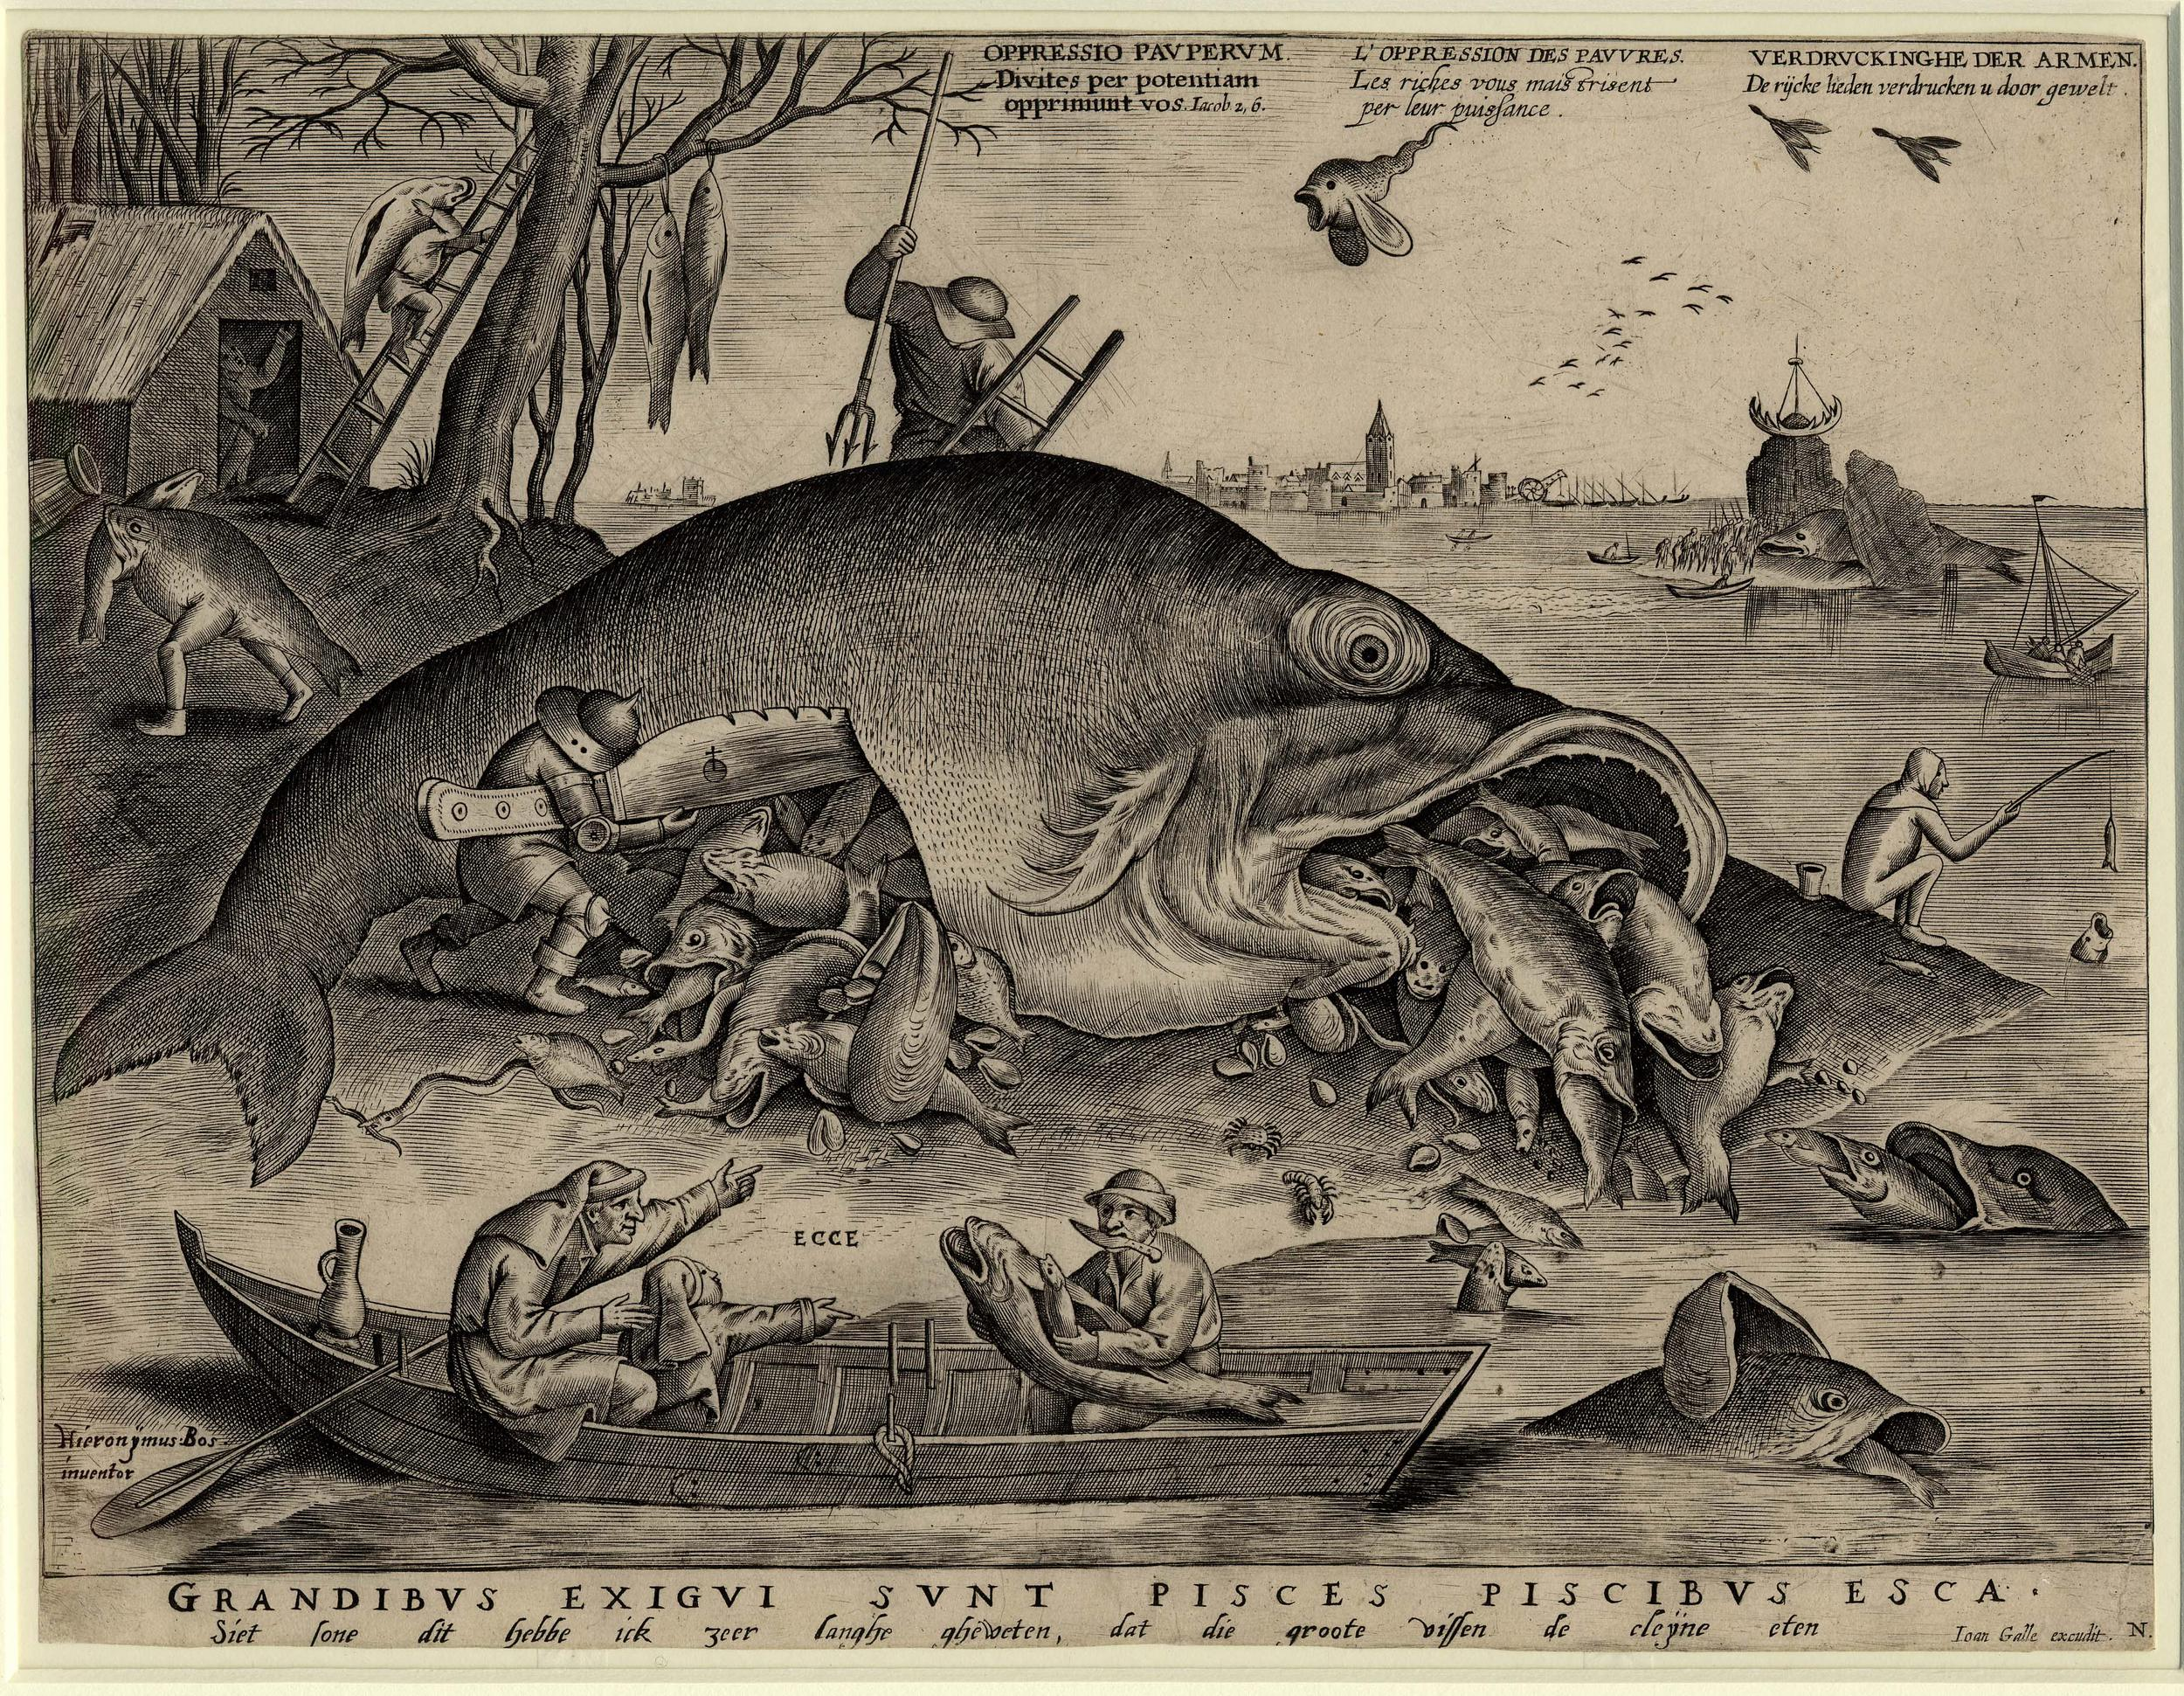

## 5. Resize and crop

DINOv2 computes patch embeddings for 14x14 pixel patches of an image.  After downloading the full resolutions of each image, resize each to 1/3 scale and right- and bottom-pad each resized image to a multiple of 14 pixels.  Write a transform function for the rescaling and another for the quantized padding.



## 6. Extract patch embeddings for each image

Extract `x_norm_patchtokens` for each image from DINOv2.  Note that these appear in reading order (i.e., row-major order) for the patches for each image.

## 7. Compute center coordinates for each patch in each image

Given that the patches are in reading order and are 14 pixels square, compute the x- and y-coordinates of the center of each patch in each image

## 8. Match patch embeddings between the images

Using [kornia's `feature.match_smnn`](https://kornia.readthedocs.io/en/stable/feature.html#kornia.feature.match_smnn), find mutual nearest neighbor matches between the patch features of the two images further filtered by a distance ratio test for the distance to the second nearest neighbor.  You may need to experiment with the ratio.

## 9. Compute a robust homography to bring the drawing into alignment with the print

Using `cv2.findHomography` or similar, compute a robust homography that will bring the drawing into alignment with the print (we chose this because the print has extra border material not present in the drawing.)  Use RANSAC or [MAGSAC++](https://forum.opencv.org/t/can-i-use-usac-magsac-with-cv2-findhomography/12383) to estimate the homography robustly, filtering out outliers.

## 10. Visualize the inlier matches

Show the (rescaled, edge-padded) images side by side in different axes and indicate with colored dots the coordinates of the matches between the two images.

## 11. Transform the drawing to match the print

Using `cv2.warp_perspective` and the homography you found in step 9, resample the drawing with the homography so that it perfectly fits the pixel dimensions of the print.  Ensure that the edges are padded with black where there is no image data from the print.

## 12. Animate the results

Using [`mediapy.show_video()`](https://google.github.io/mediapy/mediapy.html#show_video), make a 1 frame per second infinitely looping animated GIF that toggles between the two registered images.  (Note that animation is only possible if the images to animate have identical pixel dimension.)